In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv


In [3]:
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import plotly.express as px
import numpy as np
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
from keras.regularizers import l2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [4]:
df = pd.read_csv('/kaggle/input/age-gender-and-ethnicity-face-data-csv/age_gender.csv')

In [5]:
df.head(100)

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...
...,...,...,...,...,...
95,1,2,0,20161219204848341.jpg.chip.jpg,133 213 218 221 216 207 184 211 220 239 235 24...
96,1,2,0,20161219204858548.jpg.chip.jpg,62 55 97 148 169 187 194 189 191 197 195 190 1...
97,1,2,0,20161219204634589.jpg.chip.jpg,200 204 205 207 208 212 213 216 217 217 215 21...
98,1,2,0,20161219204951309.jpg.chip.jpg,245 236 239 234 220 233 237 216 234 214 208 21...


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


In [7]:
df.describe()

,age,ethnicity,gender
count,23705.000000,23705.000000,23705.000000
mean,33.300907,1.269226,0.477283
std,19.885708,1.345638,0.499494
min,1.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000
50%,29.000000,1.000000,0.000000
75%,45.000000,2.000000,1.000000
max,116.000000,4.000000,1.000000


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

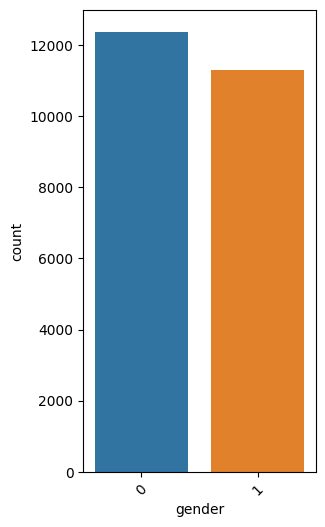

In [12]:
plt.figure(figsize=(3,6))
sns.countplot(data=df, x='gender')
plt.xticks(rotation=45)

In [13]:
df['age'].value_counts()

age
26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: count, Length: 104, dtype: int64

In [14]:
df['gender'].value_counts()

gender
0    12391
1    11314
Name: count, dtype: int64

In [15]:
df['pixels']=df['pixels'].apply(lambda x:  np.array(x.split(), dtype="float32"))

In [16]:
X = np.array(df['pixels'].tolist())
X.shape

(23705, 2304)

In [17]:
X[2]

array([ 67.,  70.,  71., ..., 112., 111., 108.], dtype=float32)

In [18]:
X= X.reshape(-1,48,48,1)

In [19]:
X[0].shape

(48, 48, 1)

Text(0.5, 0, 'Age:1  Gender:0')

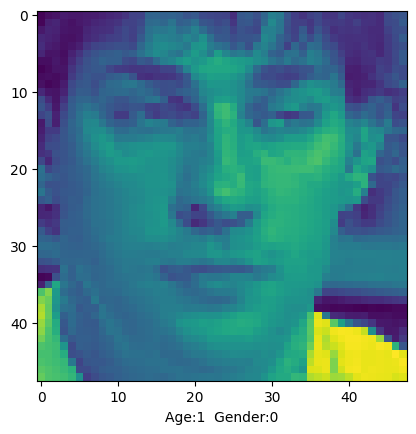

In [21]:
plt.imshow(X[12342])
plt.xlabel(
        "Age:"+str(df['age'].iloc[0])+
        "  Gender:"+ str(df['gender'].iloc[0])
)

In [22]:
df["age"] = pd.cut(df["age"],bins=[0,5,20,40,65,116],labels=["0","1","2","3","4"])

In [23]:
y= to_categorical(np.array(df['age']),num_classes=5)

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [25]:
model_age = Sequential()
model_age.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(BatchNormalization())
model_age.add(MaxPool2D(pool_size=(2,2)))

model_age.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_age.add(MaxPool2D(pool_size=(2,2)))
model_age.add(Flatten())

model_age.add(Dense(256,activation='relu',kernel_regularizer=l2(0.01)))
model_age.add(Dropout(0.5))
model_age.add(Dense(5,activation='softmax'))

# sgd = tf.keras.optimizers.SGD(momentum=0.9)
model_age.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [28]:
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor the validation loss
    patience=10,           # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,  # Restore model weights from the epoch with the best value of the monitored quantity
    verbose=1
)

In [29]:
epochs = 200
batch_size = 64

history_age = model_age.fit(
    X_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_data=(X_test, y_test),
    steps_per_epoch=X_train.shape[0] // batch_size,
    callbacks=[early_stopping]
)

Epoch 1/200
296/296 [==============================] - 19s 62ms/step - loss: 2.8908 - accuracy: 0.6226 - val_loss: 1.3941 - val_accuracy: 0.6880
Epoch 2/200
296/296 [==============================] - 18s 60ms/step - loss: 1.1434 - accuracy: 0.6931 - val_loss: 0.9698 - val_accuracy: 0.7045
Epoch 3/200
296/296 [==============================] - 18s 61ms/step - loss: 0.9344 - accuracy: 0.7115 - val_loss: 0.8930 - val_accuracy: 0.7163
Epoch 4/200
296/296 [==============================] - 17s 59ms/step - loss: 0.8739 - accuracy: 0.7279 - val_loss: 1.2128 - val_accuracy: 0.5602
Epoch 5/200
296/296 [==============================] - 18s 61ms/step - loss: 0.8448 - accuracy: 0.7307 - val_loss: 0.8394 - val_accuracy: 0.7363
Epoch 6/200
296/296 [==============================] - 18s 60ms/step - loss: 0.8192 - accuracy: 0.7461 - val_loss: 0.7998 - val_accuracy: 0.7524
Epoch 7/200
296/296 [==============================] - 18s 60ms/step - loss: 0.8135 - accuracy: 0.7461 - val_loss: 0.7867 - val_ac

In [30]:
fig = px.line(
    history_age.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [36]:
loss, acc = model_age.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.786736786365509
Test Accuracy: 0.7568023800849915


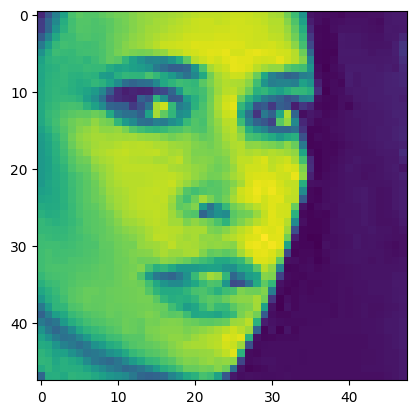

In [39]:
plt.imshow(X_test[967])

In [40]:
input_image = np.expand_dims(X_test[967], axis=0)

predictions = model_age.predict(input_image)
np.argmax(predictions)

1/1 [==============================] - 0s 107ms/step


2

In [41]:
y= df['gender']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state = 42)

In [42]:
model_gender = Sequential()
model_gender.add(Conv2D(16,kernel_size=(3,3),activation='relu',padding='same',input_shape=(48,48,1),kernel_regularizer=l2(0.01)))
model_gender.add(BatchNormalization())
model_gender.add(MaxPool2D(pool_size=(2,2)))

model_gender.add(Conv2D(32,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_gender.add(BatchNormalization())
model_gender.add(MaxPool2D(pool_size=(2,2)))

model_gender.add(Conv2D(64,kernel_size=(3,3),activation='relu',padding='same',kernel_regularizer=l2(0.01)))
model_gender.add(MaxPool2D(pool_size=(2,2)))
model_gender.add(Flatten())

model_gender.add(Dense(256,activation='relu'))
model_gender.add(Dropout(0.5))
model_gender.add(Dense(1,activation='sigmoid'))

sgd = tf.keras.optimizers.SGD(momentum=0.9)
model_gender.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [43]:
early_stopping = EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [44]:
epochs = 200  
batch_size = 64

history_gender = model_gender.fit(X_train, y_train, batch_size=batch_size,
                              epochs = epochs, validation_data = (X_test,y_test), steps_per_epoch= X_train.shape[0] // batch_size, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/200
296/296 [==============================] - 20s 63ms/step - loss: 0.9151 - accuracy: 0.7766 - val_loss: 0.5848 - val_accuracy: 0.8585 - lr: 0.0010
Epoch 2/200
296/296 [==============================] - 18s 60ms/step - loss: 0.4769 - accuracy: 0.8613 - val_loss: 0.3900 - val_accuracy: 0.8819 - lr: 0.0010
Epoch 3/200
296/296 [==============================] - 18s 61ms/step - loss: 0.3816 - accuracy: 0.8760 - val_loss: 0.3732 - val_accuracy: 0.8718 - lr: 0.0010
Epoch 4/200
296/296 [==============================] - 18s 61ms/step - loss: 0.3497 - accuracy: 0.8820 - val_loss: 0.3354 - val_accuracy: 0.8901 - lr: 0.0010
Epoch 5/200
296/296 [==============================] - 18s 60ms/step - loss: 0.3300 - accuracy: 0.8905 - val_loss: 0.3403 - val_accuracy: 0.8897 - lr: 0.0010
Epoch 6/200
296/296 [==============================] - 18s 61ms/step - loss: 0.3186 - accuracy: 0.8973 - val_loss: 0.3417 - val_accuracy: 0.8800 - lr: 0.0010
Epoch 7/200
296/296 [==============================]

In [45]:
fig = px.line(
    history_gender.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'}, 
    title='Training History')
fig.show()

In [46]:
loss, acc = model_gender.evaluate(X_test, y_test, verbose=0)
print('Test loss: {}'.format(loss))
print('Test Accuracy: {}'.format(acc))

Test loss: 0.32818853855133057
Test Accuracy: 0.8932714462280273
